In [160]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [161]:
data = pd.read_csv('coupons.csv')

In [162]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [163]:
data.tail(10)



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1
12678,Home,Partner,Sunny,30,10PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [164]:
data.dtypes



destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [165]:
data["coupon"].value_counts()


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [166]:
data["age"].value_counts()


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [167]:
data["gender"].value_counts()


gender
Female    6511
Male      6173
Name: count, dtype: int64

In [168]:
data["CarryAway"].value_counts()


CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [169]:
data.isna().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [170]:
accept = data['Y'].sum() / data.shape[0]
accept_rounded = round(accept, 4)
accept_rounded


0.5684

In [171]:
df = pd.read_csv('coupons.csv') 



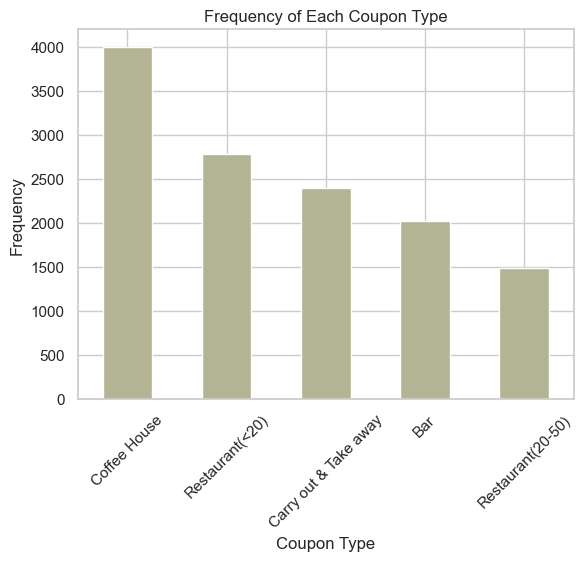

In [196]:

coupon_counts = df['coupon'].value_counts()


coupon_counts.plot(kind='bar', color='#b2b494')


plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Coupon Type')
plt.xticks(rotation=45)  
plt.show()


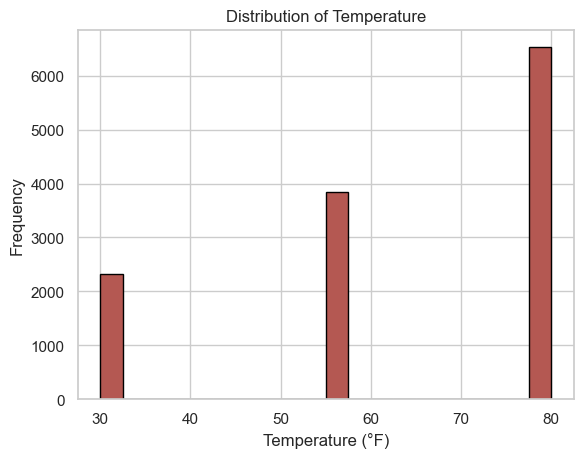

In [195]:

plt.hist(df['temperature'], bins=20, color='#b45852', edgecolor='black')


plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')


plt.show()


In [174]:
bar_coupons_df = df[df['coupon'].str.contains("Bar")]


In [175]:
bar_coupons_df = df[df['coupon'].str.contains("Bar", case=False)]


In [176]:
print(bar_coupons_df.head())  # Prints the first few rows of the new DataFrame


        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

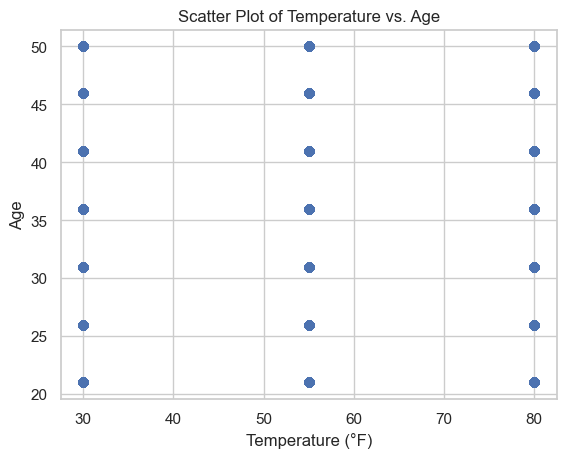

In [177]:
df['age_numeric'] = pd.to_numeric(df['age'].str.extract('(\d+)')[0])


plt.scatter(df['temperature'], df['age_numeric'])


plt.xlabel('Temperature (°F)')
plt.ylabel('Age')
plt.title('Scatter Plot of Temperature vs. Age')


plt.show()


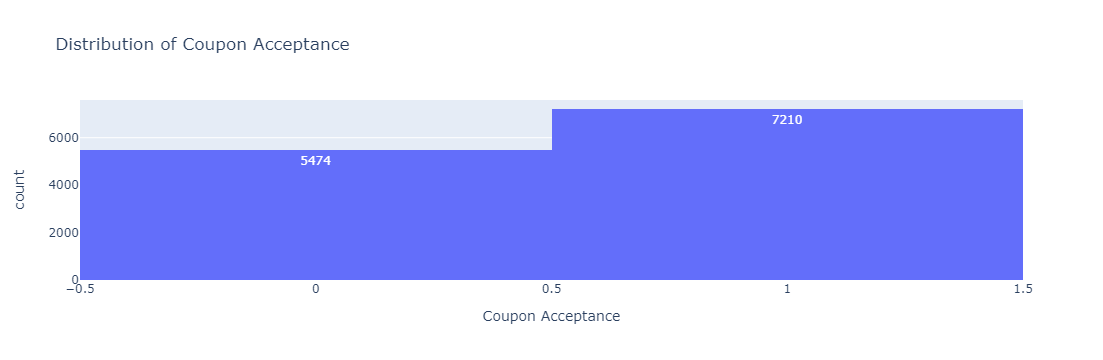

In [178]:
import plotly.express as px

hist = px.histogram(data, x='Y', nbins=2, text_auto=True,
                    labels={'Y':'Coupon Acceptance'}, title='Distribution of Coupon Acceptance')
hist.show()


In [179]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [180]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


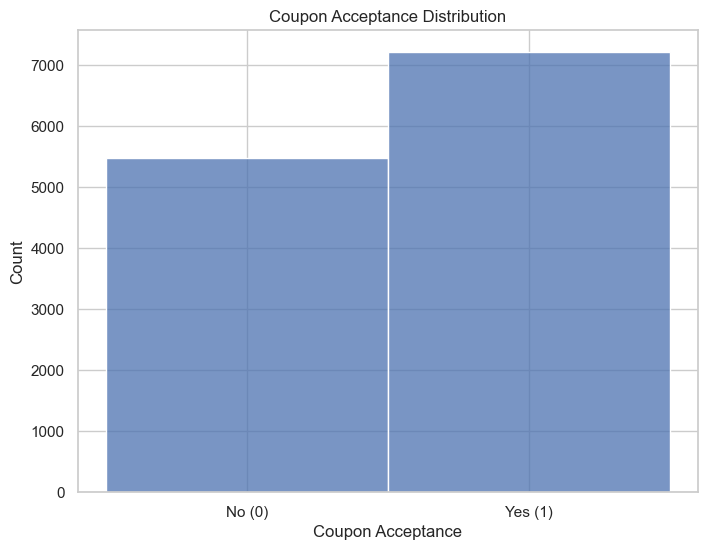

In [181]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns_hist = sns.histplot(data=data, x='Y', discrete=True, kde=False)
sns_hist.set(title='Coupon Acceptance Distribution', xlabel='Coupon Acceptance', ylabel='Count')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])  # Setting custom labels for clarity
plt.show()


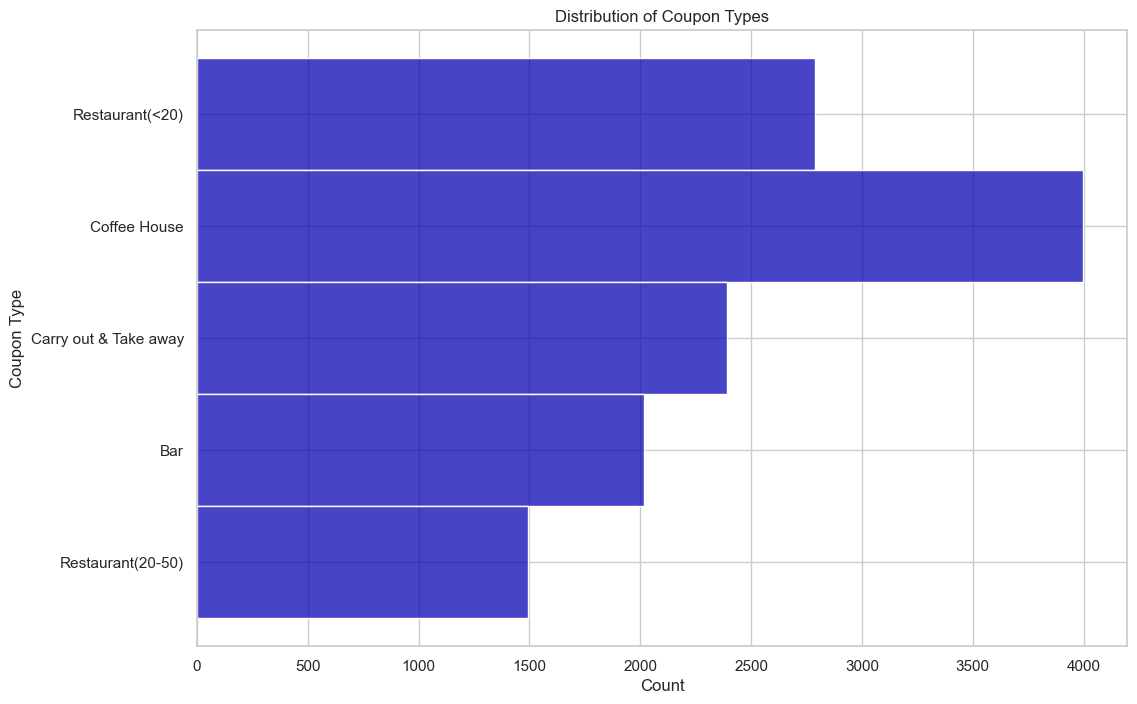

In [182]:
plt.figure(figsize=(12, 8))
sns_hist_coupon = sns.histplot(data=data, y='coupon', color='#0b05b4')
sns_hist_coupon.set(title='Distribution of Coupon Types', xlabel='Count', ylabel='Coupon Type')
plt.show()


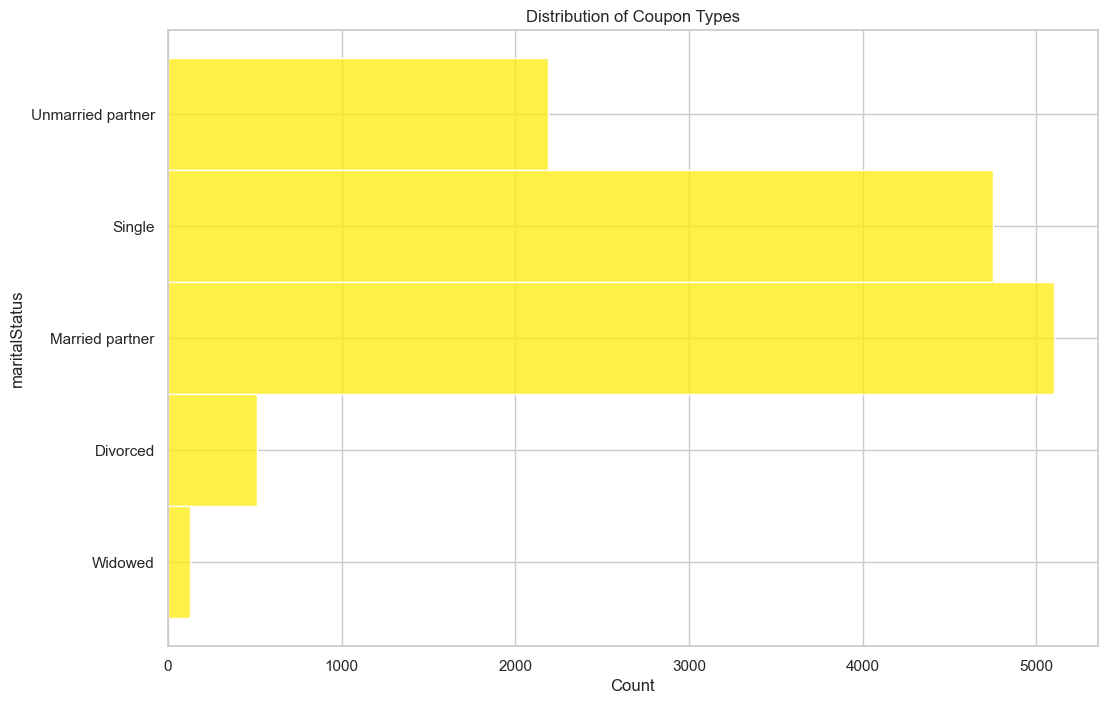

In [183]:
plt.figure(figsize=(12, 8))
sns_hist_coupon = sns.histplot(data=data, y='maritalStatus', color='#ffeb0a')
sns_hist_coupon.set(title='Distribution of Coupon Types', xlabel='Count', ylabel='maritalStatus')
plt.show()


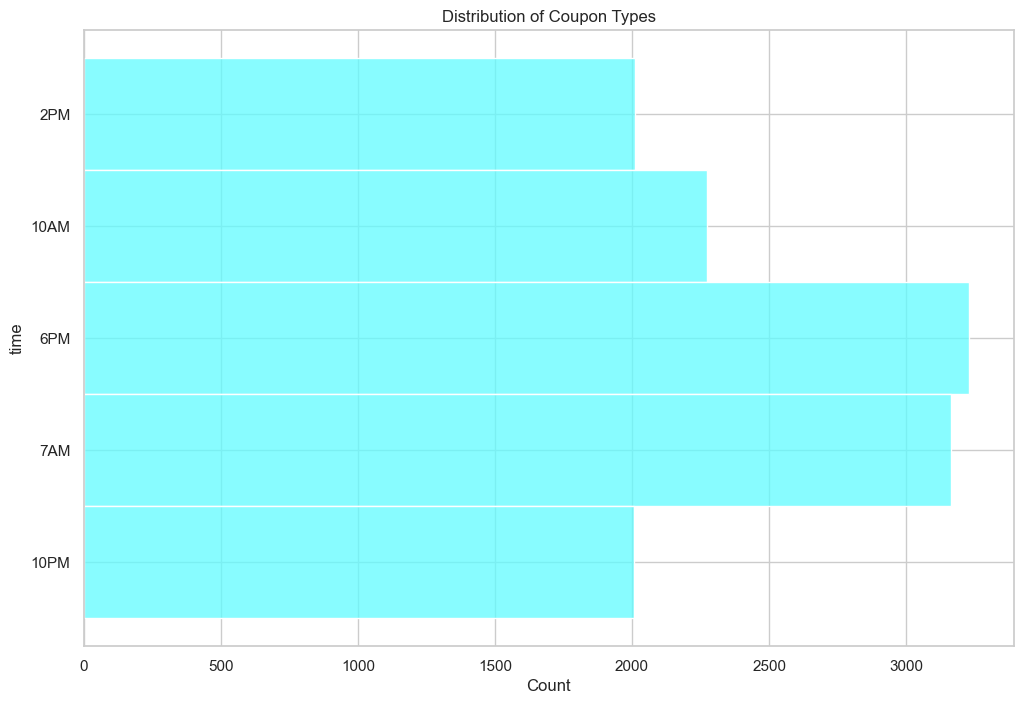

In [184]:
plt.figure(figsize=(12, 8))
sns_hist_coupon = sns.histplot(data=data, y='time', color='#60fcff')
sns_hist_coupon.set(title='Distribution of Coupon Types', xlabel='Count', ylabel='time')
plt.show()

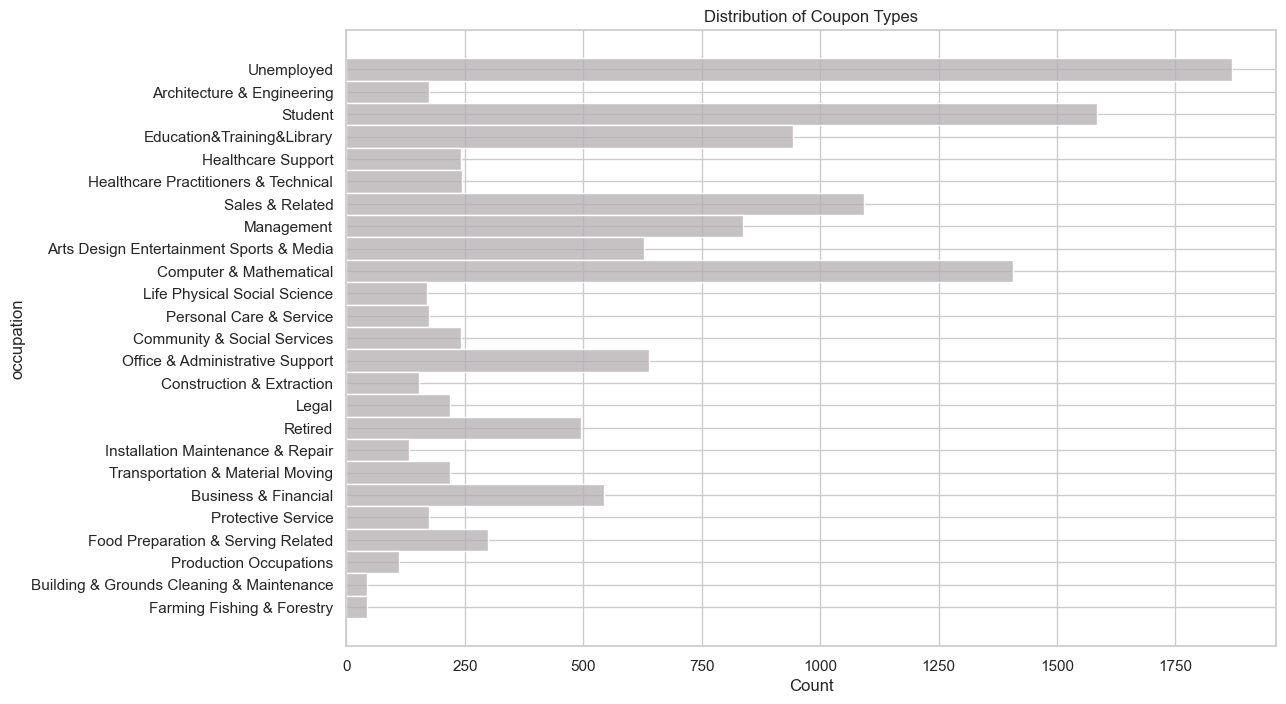

In [185]:
plt.figure(figsize=(12, 8))
sns_hist_coupon = sns.histplot(data=data, y='occupation', color='#b4aeb1')
sns_hist_coupon.set(title='Distribution of Coupon Types', xlabel='Count', ylabel='occupation')
plt.show()

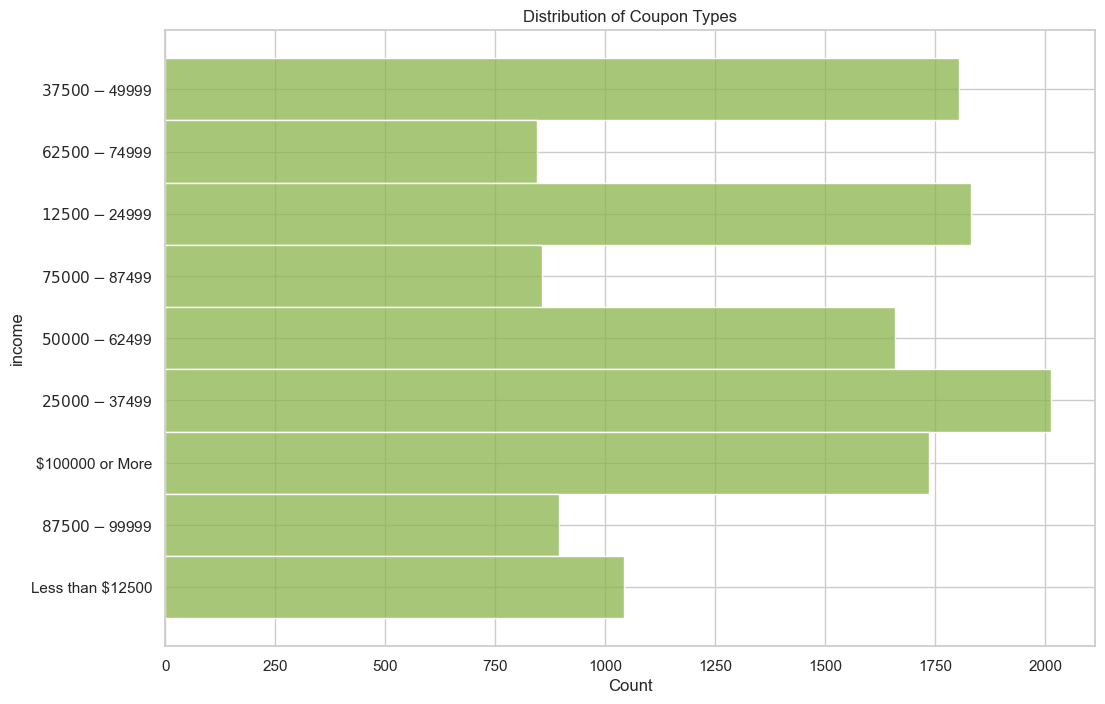

In [186]:
plt.figure(figsize=(12, 8))
sns_hist_coupon = sns.histplot(data=data, y='income', color='#8ab44a')
sns_hist_coupon.set(title='Distribution of Coupon Types', xlabel='Count', ylabel='income')
plt.show()

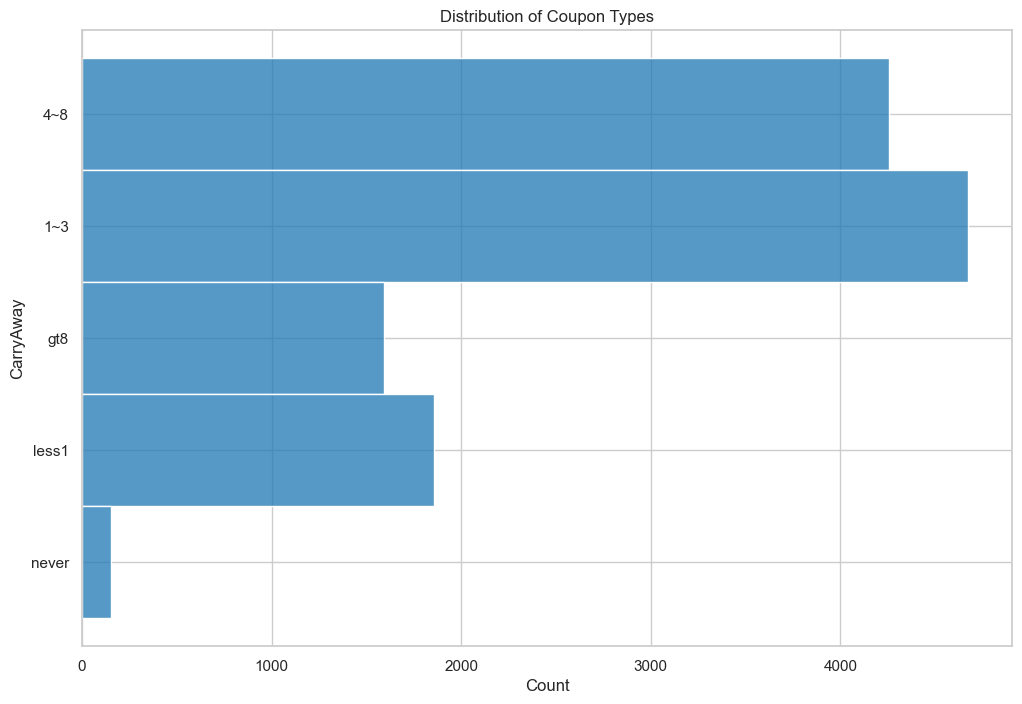

In [187]:
plt.figure(figsize=(12, 8))
sns_hist_coupon = sns.histplot(data=data, y='CarryAway', color='#1f77b4')
sns_hist_coupon.set(title='Distribution of Coupon Types', xlabel='Count', ylabel='CarryAway')
plt.show()

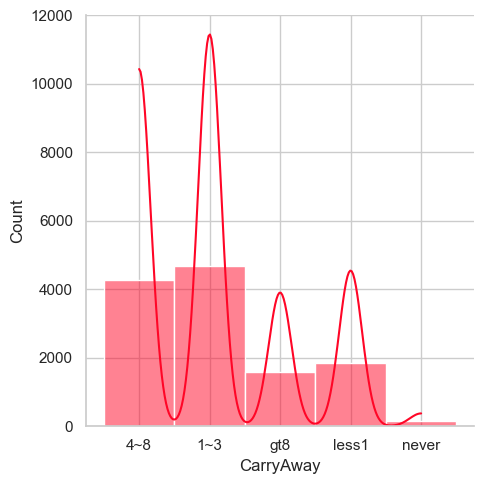

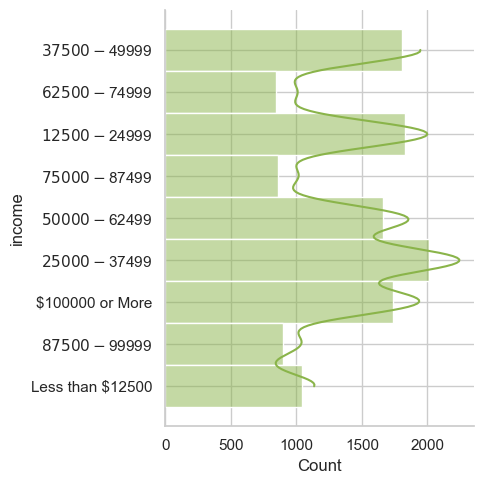

In [188]:
sns_hist_coupon = sns.displot(data=data, x='CarryAway', color='#ff0627', kde=True)
sns_hist_coupon = sns.displot(data=data, y='income', color='#8ab44a', kde=True)

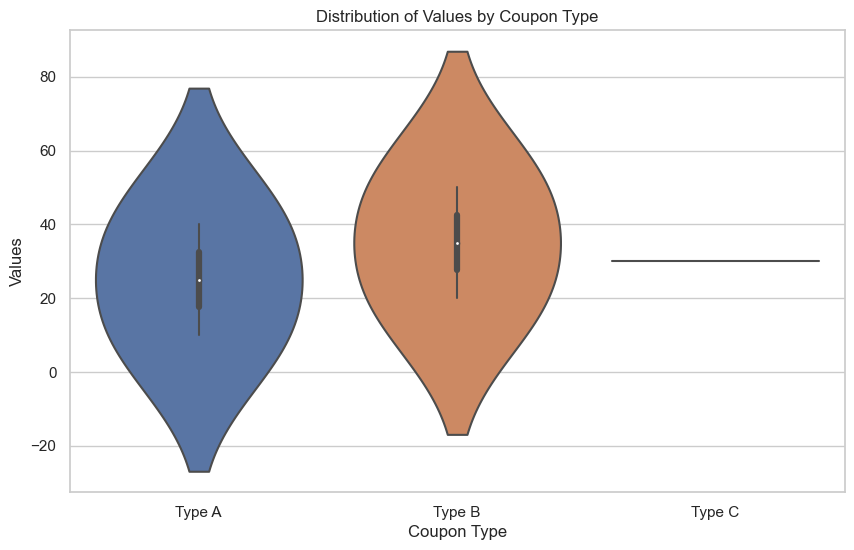

In [189]:

data = pd.DataFrame({
    'coupon_type': ['Type A', 'Type B', 'Type C', 'Type A', 'Type B'],
    'value_column': [10, 20, 30, 40, 50]
})


plt.figure(figsize=(10, 6))
sns.violinplot(x='coupon_type', y='value_column', data=data)

plt.title('Distribution of Values by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Values')
plt.show()


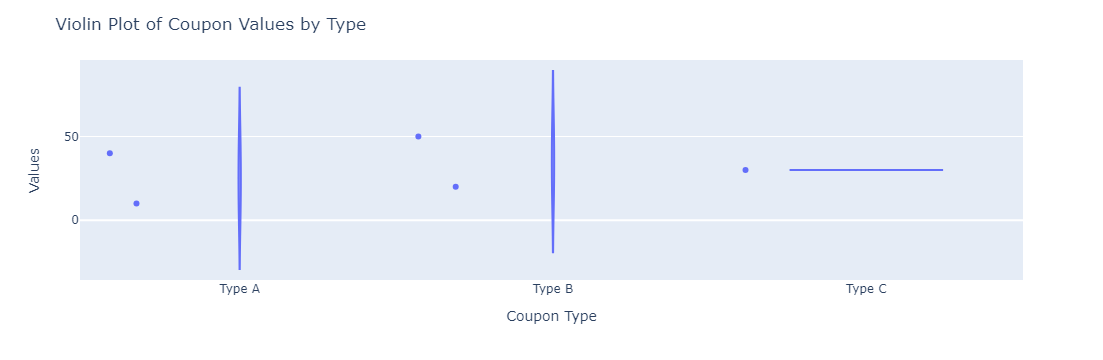

In [190]:

data = pd.DataFrame({
    'coupon_type': ['Type A', 'Type B', 'Type C', 'Type A', 'Type B'],
    'value': [10, 20, 30, 40, 50]
})


fig = px.violin(data, y='value', x='coupon_type', points='all')


fig.update_layout(
    title='Violin Plot of Coupon Values by Type',
    xaxis_title='Coupon Type',
    yaxis_title='Values'
)


fig.show()


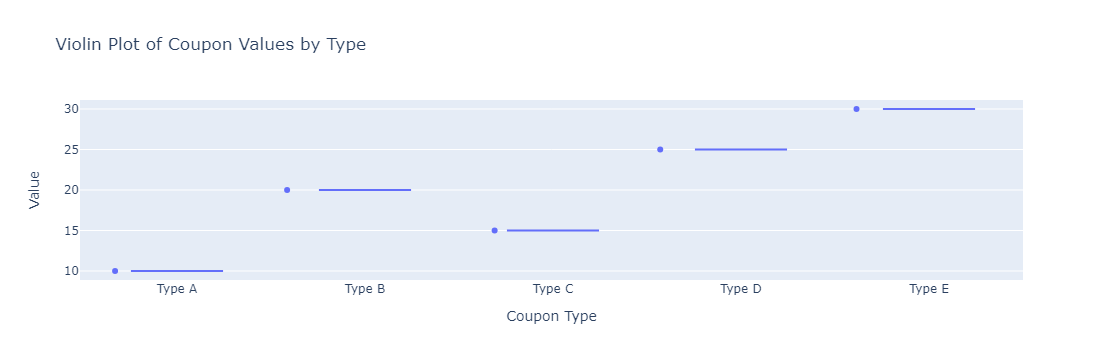

In [191]:

temp = pd.DataFrame({
    'coupon_type': ['Type A', 'Type B', 'Type C', 'Type D', 'Type E'],
    'value': [10, 20, 15, 25, 30]
})


fig = px.violin(temp, y='value', x='coupon_type', points='all', 
                title='Violin Plot of Coupon Values by Type',
                labels={'coupon_type': 'Coupon Type', 'value': 'Value'})

# Show the plot
fig.show()


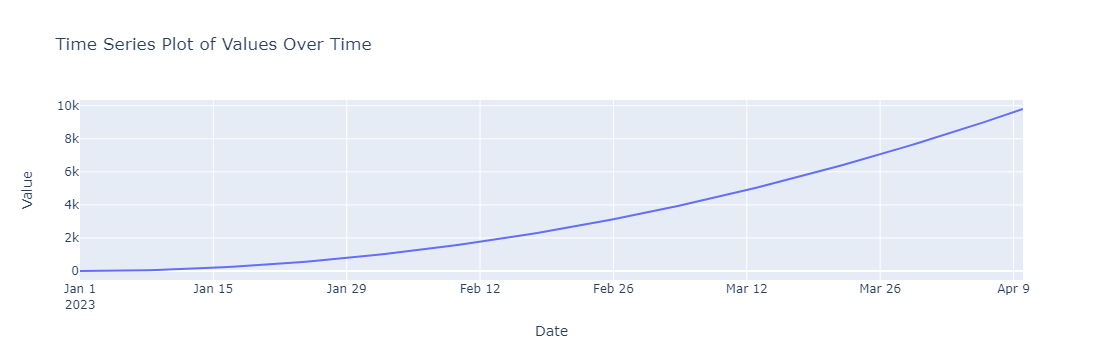

In [192]:
import plotly.express as px
import pandas as pd

# Example setup for DataFrame 'time_data' (adjust with your actual data)
# Assuming 'date' is the datetime variable and 'value' is the numerical variable you want to plot
time_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'value': [i**2 for i in range(100)]  # Example values; replace with actual data
})

# Creating the time series plot using Plotly
fig = px.line(time_data, x='date', y='value', 
              title='Time Series Plot of Values Over Time',
              labels={'date': 'Date', 'value': 'Value'})

# Show the plot
fig.show()


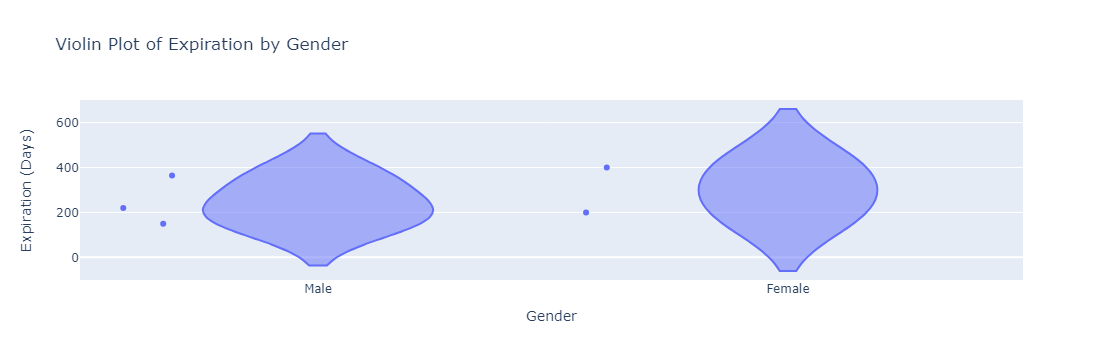

In [193]:

data = pd.DataFrame({
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'expiration': [365, 200, 150, 400, 220]  # This could represent days until expiration or expiration years
})


fig = px.violin(data, y='expiration', x='gender', points='all',
                title='Violin Plot of Expiration by Gender',
                labels={'gender': 'Gender', 'expiration': 'Expiration (Days)'})  # Adjust label to match the unit


fig.show()


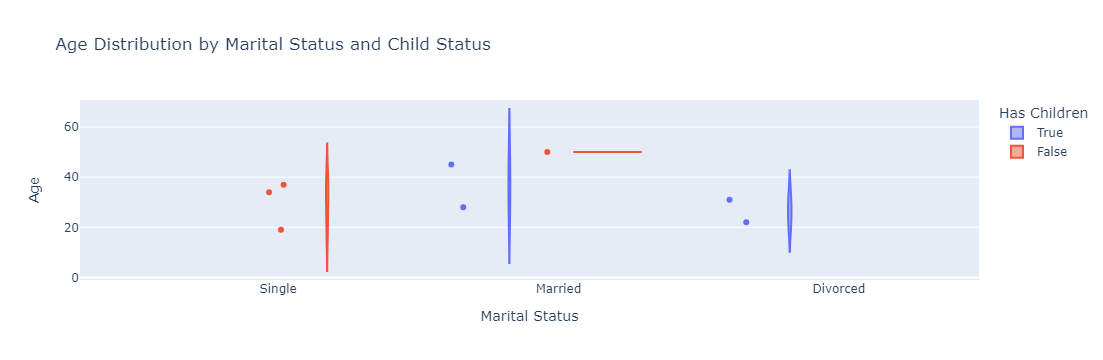

In [194]:

data = pd.DataFrame({
    'age': [28, 34, 19, 45, 22, 50, 31, 37],
    'maritalStatus': ['Married', 'Single', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single'],
    'has_children': [True, False, False, True, True, False, True, False]
})


fig = px.violin(data, y='age', x='maritalStatus', color='has_children',
                title='Age Distribution by Marital Status and Child Status',
                labels={'age': 'Age', 'maritalStatus': 'Marital Status', 'has_children': 'Has Children'},
                category_orders={"maritalStatus": ["Single", "Married", "Divorced"], "has_children": [True, False]})  # Order can be adjusted as needed


fig.update_traces(points='all')  # This shows all individual points within each violin


fig.show()
